In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
dbfile = 'data/soccerdb.sqlite'
db = sqlite3.connect(dbfile)

In [3]:
sql = """
SELECT P.id, P.name,
         P.birthday, P.height, P.weight,
       AVG(S.overall_rating) AS rating,
       AVG(S.finishing) AS finishing,
       AVG(S.short_passing) AS short_pass,
       AVG(S.long_passing) AS long_pass,
       AVG(s.interceptions) AS defense,
       AVG(S.gk_diving) AS gk
FROM player AS P
JOIN player_attribute_survey S on P.id = S.player_id
GROUP BY P.id, P.name,
         P.birthday, P.height, P.weight
"""

In [4]:
P = pd.read_sql_query(sql, db, index_col='id', 
                      parse_dates='birthday')

In [5]:
P.head()

,name,birthday,height,weight,rating,finishing,short_pass,long_pass,defense,gk
id,,,,,,,,,,
2625,"Patryk Rachwal,18",1981-01-27,175.26,154,60.142857,47.285714,56.500000,65.571429,62.071429,12.428571
2752,Diego Mainz,1982-12-29,187.96,174,69.380952,37.428571,54.809524,59.571429,71.428571,11.095238
2768,Jose Dorado,1982-07-10,180.34,154,69.285714,42.761905,64.714286,57.000000,74.714286,10.761905
2770,Ignacio Gonzalez,1982-05-14,180.34,161,71.133333,67.666667,72.533333,70.266667,44.933333,8.666667
2790,Alberto Rey,1974-02-15,175.26,163,70.200000,37.400000,68.000000,69.800000,63.400000,8.000000


In [6]:
import matplotlib.pyplot as plt

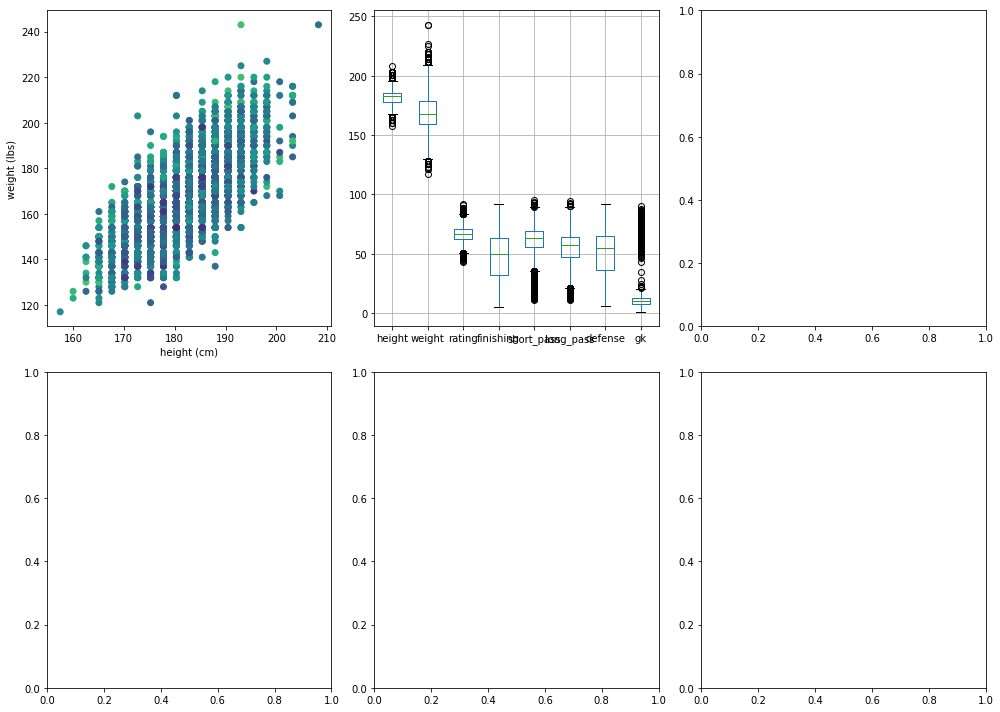

In [7]:
fig, ax = plt.subplots(figsize=(14,10), ncols=3, nrows=2)
ax[0,0].scatter(P.height, P.weight, c=P.rating)
ax[0,0].set_xlabel('height (cm)')
ax[0,0].set_ylabel('weight (lbs)')
P.boxplot(ax=ax[0,1])
plt.tight_layout()
plt.show()

In [ ]:
X = np.array(P[['rating', 'finishing', 'short_pass']])

In [ ]:
X

In [ ]:
np.cov(X.T)

In [8]:
P.to_excel('data/players.xlsx')